In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
alpha = np.random.uniform(0,1)
betta = np.random.uniform(0,1)
eps = 0.001

k = np.array([i for i in range(101)])
xk = k/100
delta = np.random.normal(0, 1, size=len(xk))
yk = alpha*xk + betta + delta

In [ ]:
def linear(x,a,b):
    return a*x+b

In [ ]:
def rational(x,a,b):
    return a/(1+b*x)

In [ ]:
def grad_Dlin(a, b):
    return np.array([DerivDA(a, b), DerivDB(a, b)])

In [ ]:
def DerivDA(a, b):
    DerivA = 2*a*(np.sum(xk)**2)+2*b*np.sum(xk)-2*np.sum(xk)*np.sum(yk)
    return DerivA

In [ ]:
def DerivDB(a, b):
    DerivB = 2*a*np.sum(xk)-2*np.sum(yk)+2*b*101
    return DerivB

In [ ]:
def grad_DRat(a, b):
    return np.array([DerivRatDA(a, b), DerivRatDB(a, b)])

In [ ]:
def DerivRatDA(a, b):
	return 2*np.sum(a/(1 + b*xk)**2 - yk/(1 + b*xk))

In [ ]:
def DerivRatDB(a, b):
	return 2*np.sum(-a**2*xk/(1 + b*xk)**3 + a*xk*yk/(1 + b*xk)**2)

In [ ]:
def HessianLinD(a, b):
    return np.array([[Deriv2AA(a, b), Deriv2AB(a, b)], [Deriv2BA(a, b), Deriv2BB(a, b)]])

In [ ]:
def Deriv2AA(a, b):
    Deriv2 = 2*(np.sum(xk)**2)
    return Deriv2
def Deriv2AB(a, b):
    Deriv2 = 2*(np.sum(xk))
    return Deriv2
def Deriv2BA(a, b):
    Deriv2 = 2*(np.sum(xk))
    return Deriv2
def Deriv2BB(a, b):
    return 2*101

In [ ]:
def HessianRatD(a, b):
    return np.array([[Deriv2RatAA(a, b), Deriv2RatAB(a, b)], [Deriv2RatBA(a, b), Deriv2RatBB(a, b)]])

In [ ]:
def Deriv2RatAA(a, b):
    return 2*np.sum(1/(1 + b*xk)**2)
def Deriv2RatAB(a, b):
    return 2*np.sum(-2*a*xk/(1 + b*xk)**3 + xk*yk/(1 + b*xk)**2)
def Deriv2RatBA(a, b):
    return 2*np.sum(-2*a*xk/(1 + b*xk)**3 + xk*yk/(1 + b*xk)**2)
def Deriv2RatBB(a, b):
    return 2*np.sum(3*a**2*xk**2/(1 + b*xk)**4 - 2*a*xk**2*yk/(1 + b*xk)**3)

In [ ]:
def NewtonsMethodLin(e):
    FuncCalcs = 1
    point = [np.array([3, 3], dtype=float)]

    point += [point[-1] - np.dot(np.linalg.inv(HessianLinD(point[-1][0], point[-1][1])), grad_Dlin(point[-1][0], point[-1][1]))]
    while np.linalg.norm(point[-2] - point[-1]) > e:
        point += [point[-1] - np.dot(np.linalg.inv(HessianD(point[-1][0], point[-1][1])), grad_Dlin(point[-1][0], point[-1][1]))]
        FuncCalcs += 1
    return point[-1]

In [ ]:
def NewtonsMethodRat(e):
    FuncCalcs = 1
    point = [np.array([0.1, 0.1], dtype=float)]

    point += [point[-1] - np.dot(np.linalg.inv(HessianRatD(point[-1][0], point[-1][1])), grad_DRat(point[-1][0], point[-1][1]))]
    while np.linalg.norm(point[-2] - point[-1]) > e :
        point += [point[-1] - np.dot(np.linalg.inv(HessianRatD(point[-1][0], point[-1][1])), grad_DRat(point[-1][0], point[-1][1]))]
        FuncCalcs += 1
    return point[-1]

In [ ]:
NewtonsMethodRat(0.001)

array([6.63892885e-19, 7.82775051e+01])

In [ ]:
xx1=np.empty(101)
for i in range(101):
    xx1[i] = rational(i/100,6.63892885e-19,7.82775051e+01)

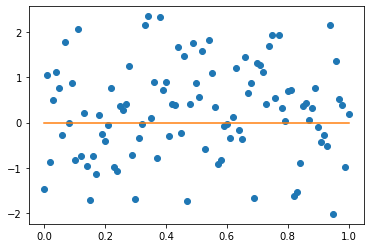

In [ ]:
plt.plot(xk,yk,'o')
plt.plot(xk,xx1)